<a href="https://colab.research.google.com/github/JuanMiguez/4tocfp10/blob/main/7_archivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Persistencia

Hasta ahora, hemos aprendido cómo escribir programas y comunicar nuestras intenciones a la Unidad Central de Procesamiento utilizando ejecuciones condicionales,
funciones, e iteraciones. Hemos aprendido como crear y usar estructuras de datos
en la Memoria Principal. La CPU y la memoria son los lugares donde nuestro
software funciona y se ejecuta. Es donde toda la inteligencia ocurre.


Pero si recuerdas nuestras discusiones de arquitectura de hardware, una vez que
la corriente se interrumpe, cualquier cosa almacenada ya sea en la CPU o en la
memoria es eliminada. Así que hasta ahora nuestros programas han sido sólo una
diversión pasajera para aprender Python.

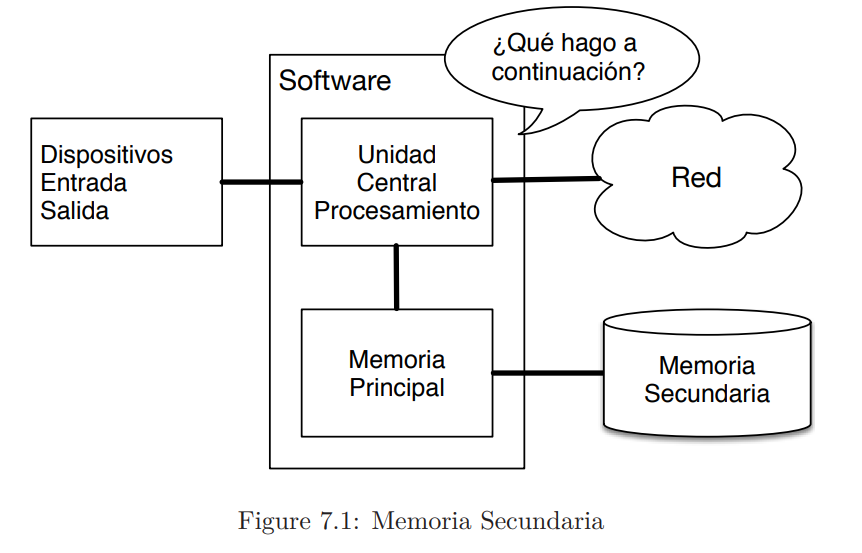

En este capítulo, vamos a comenzar a trabajar con Memoria Secundaria (o
archivos). La memoria secundaria no es eliminada cuando apagamos una computadora. Incluso, en el caso de una memoria USB, los datos que escribimos desde nuestros programas pueden ser retirados del sistema y transportados a otro
sistema.

Nos vamos a enfocar principalmente en leer y escribir archivos como los que creamos
en un editor de texto. Más adelante veremos cómo trabajar con archivos de bases
de datos, que son archivos binarios diseñados específicamente para ser leídos y
escritos a través de software para manejo de bases de datos.

## Abrir Archivos

Cuando queremos abrir o escribir un archivo (digamos, en el disco duro), primero
debemos abrir el archivo. Al abrir el archivo nos comunicamos con el sistema
operativo, el cual sabe dónde están almacenados los datos de cada archivo.
Cuando abres un archivo, le estás pidiendo al sistema operativo que encuentre
el archivo por su nombre y se asegure de que existe. En este ejemplo, abrimos
el archivo mbox.txt, el cual debería estar almacenado en el mismo directorio en
que estás localizado cuando inicias Python. Puedes descargar este archivo desde
www.py4e.com/code3/mbox.txt

In [ ]:
manejador_archivo = open('/content/drive/MyDrive/cfp-4to/mbox.txt')
print(manejador_archivo)


<_io.TextIOWrapper name='/content/drive/MyDrive/cfp-4to/mbox.txt' mode='r' encoding='UTF-8'>


Si el open es exitoso, el sistema operativo nos devuelve un manejador de archivo.
El manejador de archivo no son los datos contenidos en el archivo, sino un “manejador” (handler) que podemos usar para leer los datos. Obtendrás un manejador
de archivo si el archivo solicitado existe y si tienes los permisos apropiados para
leerlo.


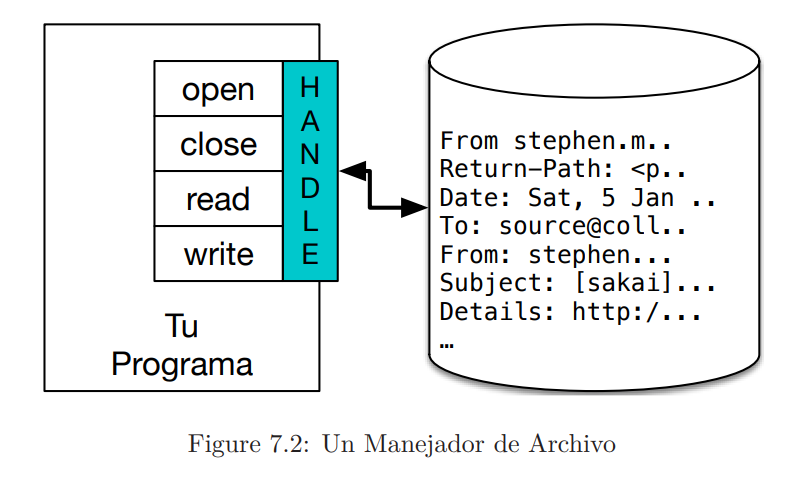

Si el archivo no existe, open fallará con un mensaje de error y no obtendrás un
manejador para acceder al contenido del archivo:


In [ ]:
manejador_archivo = open('stuff.txt')

FileNotFoundError: ignored

Más adelante vamos a utilizar try y except para controlar de mejor manera la
situación donde tratamos de abrir un archivo que no existe.

##Archivos de texto y líneas

Un archivo de texto puede ser considerado como una secuencia de líneas, así como
una cadena de Python puede ser considerada como una secuencia de caracteres.
Por ejemplo, este es un ejemplo de un archivo de texto que registra la actividad
de correos de varias personas en un equipo de desarrollo de un proyecto de código
abierto (open source):

> From stephen.marquard@uct.ac.za Sat Jan 5 09:14:16 2008
Return-Path: <postmaster@collab.sakaiproject.org>
Date: Sat, 5 Jan 2008 09:12:18 -0500
To: source@collab.sakaiproject.org
From: stephen.marquard@uct.ac.za
Subject: [sakai] svn commit: r39772 - content/branches/
Details: http://source.sakaiproject.org/viewsvn/?view=rev&rev=39772
...

El archivo completo de interacciones por correo está disponible en
www.py4e.com/code3/mbox.txt
y una versión reducida del archivo está disponible en
www.py4e.com/code3/mbox-short.txt
Esos archivos están en un formato estándar para un archivo que contiene múltiples
mensajes de correo. Las líneas que comienzan con “From” separan los mensajes
y las líneas que comienzan con “From:” son parte de esos mensajes. Para más
información acerca del formato mbox, consulta
https://es.wikipedia.org/wiki/Mbox.


Para separar el archivo en líneas, hay un carácter especial que representa el “final
de una línea” llamado salto de línea.

En Python, representamos el salto de línea como una \n en las
cadenas. Incluso aunque esto parezca dos caracteres, realmente es un solo carácter.
Cuando vemos la variable interactuando con el intérprete, este nos muestra el \n
en la cadena, pero cuando usamos print para mostrar la cadena, vemos la cadena
separada en dos líneas debido al salto de línea.

In [ ]:
cosa = 'Hola\nMundo!'
cosa

'Hola\nMundo!'

In [ ]:
print(cosa)

Hola
Mundo!


In [ ]:
cosa = 'X\nY'
print(cosa)


X
Y


In [ ]:
len(cosa)

3

También puedes ver que el tamaño de la cadena X\nY es tres caracteres debido a
que el separador de línea es un solo carácter.

Por tanto, cuando vemos las líneas en un archivo, necesitamos imaginar que ahí
hay un carácter invisible llamado separador de línea al final de cada línea, el cual
marca el final de la misma.

De modo que el separador de línea separa los caracteres del archivo en líneas.

##Lectura de archivos


Aunque el manejador de archivo no contiene los datos de un archivo, es bastante
fácil utilizarlo en un bucle for para leer a través del archivo y contar cada una de
sus líneas:

In [ ]:
man_archivo = open('/content/drive/MyDrive/cfp-4to/mbox-short.txt')
contador = 0
for linea in man_archivo:
  contador = contador + 1
print('Contador de líneas:', contador)


Contador de líneas: 1910


Podemos usar el manejador de archivos como una secuencia en nuestro bucle for.
Nuestro bucle for simplemente cuenta el número de líneas en el archivo y las
imprime. La traducción aproximada de ese bucle al español es, “para cada línea
en el archivo representado por el manejador de archivo, suma uno a la variable
contador.”


La razón por la cual la función open no lee el archivo completo es porque el archivo
puede ser muy grande, incluso con muchos gigabytes de datos. La sentencia open
emplea la misma cantidad de tiempo sin importar el tamaño del archivo. De hecho,
es el bucle for el que hace que los datos sean leídos desde el archivo.

Cuando el archivo es leído usando un bucle for de esta manera, Python se encarga
de dividir los datos del archivo en líneas separadas utilizando el separador de línea.
Python lee cada línea hasta el separador e incluye el separador como el último
carácter en la variable line para cada iteración del bucle for.

Debido a que el bucle for lee los datos línea a línea, éste puede leer eficientemente
y contar las líneas en archivos muy grandes sin quedarse sin memoria principal
para almacenar los datos. El programa previo puede contar las líneas de cualquier tamaño de archivo utilizando poca memoria, puesto que cada línea es leída, contada, y después descartada.


Si sabes que el archivo es relativamente pequeño comparado al tamaño de tu memoria principal, puedes leer el archivo completo en una sola cadena utilizando el
método read en el manejador de archivos.

In [ ]:
manejador_archivo = open('/content/drive/MyDrive/cfp-4to/mbox-short.txt')
inp = manejador_archivo.read()
print(len(inp))


94626


In [ ]:
print(inp[:20])


From stephen.marquar


En este ejemplo, el contenido completo (todos los 94626 caracteres) del archivo
mbox-short.txt son leídos directamente en la variable inp. Utilizamos el troceado de
cadenas para imprimir los primeros 20 caracteres de la cadena de datos almacenada
en inp.

Cuando el archivo es leído de esta forma, todos los caracteres incluyendo los saltos
de línea son una cadena gigante en la variable inp. Es una buena idea almacenar
la salida de read como una variable porque cada llamada a read vacía el contenido
por completo:

In [ ]:
manejador = open('/content/drive/MyDrive/cfp-4to/mbox-short.txt')
print(len(manejador.read()))

94626


In [ ]:
print(len(manejador.read()))

0


Recuerda que esta forma de la función open solo debe ser utilizada si los datos del
archivo son apropiados para la memoria principal del sistema. Si el archivo es muy
grande para caber en la memoria principal, deberías escribir tu programa para leer
el archivo en bloques utilizando un bucle for o while.

## Búsqueda a través de un archivo

Cuando buscas a través de los datos de un archivo, un patrón muy común es leer el
archivo, ignorar la mayoría de las líneas y solamente procesar líneas que cumplan
con una condición particular. Podemos combinar el patrón de leer un archivo con
métodos de cadenas para construir mecanismos de búsqueda sencillos.

Por ejemplo, si queremos leer un archivo y solamente imprimir las líneas que
comienzan con el prefijo “From:”, podríamos usar el método de cadenas startswith
para seleccionar solo aquellas líneas con el prefijo deseado:


In [ ]:
man_a = open('/content/drive/MyDrive/cfp-4to/mbox-short.txt')
contador = 0
for linea in man_a:
  if linea.startswith('From:'):
    print(linea)


From: stephen.marquard@uct.ac.za

From: louis@media.berkeley.edu

From: zqian@umich.edu

From: rjlowe@iupui.edu

From: zqian@umich.edu

From: rjlowe@iupui.edu

From: cwen@iupui.edu

From: cwen@iupui.edu

From: gsilver@umich.edu

From: gsilver@umich.edu

From: zqian@umich.edu

From: gsilver@umich.edu

From: wagnermr@iupui.edu

From: zqian@umich.edu

From: antranig@caret.cam.ac.uk

From: gopal.ramasammycook@gmail.com

From: david.horwitz@uct.ac.za

From: david.horwitz@uct.ac.za

From: david.horwitz@uct.ac.za

From: david.horwitz@uct.ac.za

From: stephen.marquard@uct.ac.za

From: louis@media.berkeley.edu

From: louis@media.berkeley.edu

From: ray@media.berkeley.edu

From: cwen@iupui.edu

From: cwen@iupui.edu

From: cwen@iupui.edu



La salida parece correcta puesto que las líneas que estamos buscando son aquellas
que comienzan con “From:”, pero ¿por qué estamos viendo las líneas vacías extras?
Esto es debido al carácter invisible salto de línea. Cada una de las líneas leídas
termina con un salto de línea, así que la sentencia print imprime la cadena almacenada en la variable line, la cual incluye ese salto de línea, y después print agrega
otro salto de línea, resultando en el efecto de doble salto de línea que observamos.

Podemos usar troceado de líneas para imprimir todos los caracteres excepto el
último, pero una forma más sencilla es usar el método rstrip, el cual elimina los
espacios en blanco del lado derecho de una cadena, tal como:

In [ ]:
man_a = open('/content/drive/MyDrive/cfp-4to/mbox-short.txt')
for linea in man_a:
  linea = linea.rstrip()
  if linea.startswith('From:'):
    print(linea)

From: stephen.marquard@uct.ac.za
From: louis@media.berkeley.edu
From: zqian@umich.edu
From: rjlowe@iupui.edu
From: zqian@umich.edu
From: rjlowe@iupui.edu
From: cwen@iupui.edu
From: cwen@iupui.edu
From: gsilver@umich.edu
From: gsilver@umich.edu
From: zqian@umich.edu
From: gsilver@umich.edu
From: wagnermr@iupui.edu
From: zqian@umich.edu
From: antranig@caret.cam.ac.uk
From: gopal.ramasammycook@gmail.com
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: stephen.marquard@uct.ac.za
From: louis@media.berkeley.edu
From: louis@media.berkeley.edu
From: ray@media.berkeley.edu
From: cwen@iupui.edu
From: cwen@iupui.edu
From: cwen@iupui.edu


a medida que tus programas de procesamiento de archivos se vuelven más complicados, quizá quieras estructurar tus bucles de búsqueda utilizando continue. La
idea básica de un bucle de búsqueda es que estás buscando líneas “interesantes” e
ignorando líneas “no interesantes”. Y cuando encontramos una línea interesante,
hacemos algo con ella.

Podemos estructurar el bucle para seguir el patrón de ignorar las líneas no interesantes así:

In [ ]:
man_a = open('/content/drive/MyDrive/cfp-4to/mbox-short.txt')
for linea in man_a:
  linea = linea.rstrip()
    # Ignorar 'líneas que no nos interesan'
  if not linea.startswith('From:'):
    continue
# Procesar la línea que nos 'interesa'
  print(linea)

From: stephen.marquard@uct.ac.za
From: louis@media.berkeley.edu
From: zqian@umich.edu
From: rjlowe@iupui.edu
From: zqian@umich.edu
From: rjlowe@iupui.edu
From: cwen@iupui.edu
From: cwen@iupui.edu
From: gsilver@umich.edu
From: gsilver@umich.edu
From: zqian@umich.edu
From: gsilver@umich.edu
From: wagnermr@iupui.edu
From: zqian@umich.edu
From: antranig@caret.cam.ac.uk
From: gopal.ramasammycook@gmail.com
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: stephen.marquard@uct.ac.za
From: louis@media.berkeley.edu
From: louis@media.berkeley.edu
From: ray@media.berkeley.edu
From: cwen@iupui.edu
From: cwen@iupui.edu
From: cwen@iupui.edu


La salida del programa es la misma. En Español, las líneas no interesantes son
aquellas que no comienzan con “From:”, así que las saltamos utilizando continue.
En cambio las líneas “interesantes” (aquellas que comienzan con “From:”) las
procesamos.


Podemos usar el método de cadenas find para simular la función de búsqueda de
un editor de texto, que encuentra las líneas donde aparece la cadena de búsqueda
en alguna parte. Puesto que find busca cualquier ocurrencia de una cadena dentro
de otra y devuelve la posición de esa cadena o -1 si la cadena no fue encontrada,
podemos escribir el siguiente bucle para mostrar las líneas que contienen la cadena “@uct.ac.za” (es decir, los que vienen de la Universidad de Cape Town en
Sudáfrica):

In [ ]:
man_a = open('/content/drive/MyDrive/cfp-4to/mbox-short.txt')
for linea in man_a:
  linea = linea.rstrip()
  if linea.find('@uct.ac.za') == -1: continue
  print(linea)

From stephen.marquard@uct.ac.za Sat Jan  5 09:14:16 2008
X-Authentication-Warning: nakamura.uits.iupui.edu: apache set sender to stephen.marquard@uct.ac.za using -f
From: stephen.marquard@uct.ac.za
Author: stephen.marquard@uct.ac.za
From david.horwitz@uct.ac.za Fri Jan  4 07:02:32 2008
X-Authentication-Warning: nakamura.uits.iupui.edu: apache set sender to david.horwitz@uct.ac.za using -f
From: david.horwitz@uct.ac.za
Author: david.horwitz@uct.ac.za
r39753 | david.horwitz@uct.ac.za | 2008-01-04 13:05:51 +0200 (Fri, 04 Jan 2008) | 1 line
From david.horwitz@uct.ac.za Fri Jan  4 06:08:27 2008
X-Authentication-Warning: nakamura.uits.iupui.edu: apache set sender to david.horwitz@uct.ac.za using -f
From: david.horwitz@uct.ac.za
Author: david.horwitz@uct.ac.za
From david.horwitz@uct.ac.za Fri Jan  4 04:49:08 2008
X-Authentication-Warning: nakamura.uits.iupui.edu: apache set sender to david.horwitz@uct.ac.za using -f
From: david.horwitz@uct.ac.za
Author: david.horwitz@uct.ac.za
From david.horw

Aquí utilizamos la forma contraída de la sentencia if donde ponemos el continue
en la misma línea que el if. Esta forma contraída del if funciona de la misma
manera que si el continue estuviera en la siguiente línea e indentado

##Permitiendo al usuario elegir el nombre de archivo

Definitivamente no queremos tener que editar nuestro código Python cada vez
que queremos procesar un archivo diferente. Sería más útil pedir al usuario que
introduzca el nombre del archivo cada vez que el programa se ejecuta, de modo
que pueda usar nuestro programa en diferentes archivos sin tener que cambiar el
código.

Esto es sencillo de hacer leyendo el nombre de archivo del usuario utilizando input
como se muestra a continuación:

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
narchivo = input('Ingresa un nombre de archivo: ')
man_a = open("/content/drive/MyDrive/cfp-4to/"+narchivo)
contador = 0
for linea in man_a:
  if linea.startswith('Subject:'):
    contador = contador + 1
print('Hay', contador, 'líneas de asunto (subject) en', narchivo)

Ingresa un nombre de archivo: mbox-short.txt
Hay 27 líneas de asunto (subject) en mbox-short.txt


Leemos el nombre de archivo del usuario y lo guardamos en una variable llamada
fname y abrimos el archivo. Ahora podemos ejecutar el programa repetidamente
en diferentes archivos.

Antes de mirar la siguiente sección, observa el programa anterior y pregúntate a
ti mismo, “¿Qué error podría suceder aquí?” o “¿Qué podría nuestro amigable
usuario hacer que cause que nuestro pequeño programa termine no exitosamente
con un error, haciéndonos ver no-muy-geniales ante los ojos de nuestros usuarios?”

##Utilizando try, except, y open

Te dije que no miraras. Esta es tu última oportunidad.

¿Qué tal si nuestro usuario escribe algo que no es un nombre de archivo?

In [6]:
narchivo = input('Ingresa un nombre de archivo: ')
man_a = open("/content/drive/MyDrive/cfp-4to/"+narchivo)
contador = 0
for linea in man_a:
  if linea.startswith('Subject:'):
    contador = contador + 1
print('Hay', contador, 'líneas de asunto (subject) en', narchivo)

Ingresa un nombre de archivo: moski


FileNotFoundError: ignored

No te rías. Los usuarios eventualmente harán cualquier cosa que puedan para
estropear tus programas, sea a propósito o sin intenciones maliciosas. De hecho,
una parte importante de cualquier equipo de desarrollo de software es una persona
o grupo llamado Quality Assurance (Control de Calidad) (o QA en inglés) cuyo
trabajo es probar las cosas más locas posibles en un intento de hacer fallar el
software que el programador ha creado.

El equipo de QA (Control de Calidad) es responsable de encontrar los fallos en
los programas antes de éstos sean entregados a los usuarios finales, que podrían
comprar nuestro software o pagar nuestro salario por escribirlo. Así que el equipo
de QA es el mejor amigo de un programador.

Ahora que vemos el defecto en el programa, podemos arreglarlo de forma elegante
utilizando la estructura try/except. Necesitamos asumir que la llamada a open
podría fallar y agregar código de recuperación para ese fallo, así:

In [7]:
narchivo = input('Ingresa un nombre de archivo: ')
try:
  man_a = open("/content/drive/MyDrive/cfp-4to/"+narchivo)
except:
  print('No se puede abrir el archivo:', narchivo)
  exit()
contador = 0
for linea in man_a:
  if linea.startswith('Subject:'):
    contador = contador + 1
print('Hay', contador, 'líneas de asunto (subject) en', narchivo)

Ingresa un nombre de archivo: moski
No se puede abrir el archivo: moski
Hay 0 líneas de asunto (subject) en moski


La función exit termina el programa. Es una función que llamamos que nunca
retorna. Ahora cuando nuestro usuario (o el equipo de QA) introduzca algo sin
sentido o un nombre de archivo incorrecto, vamos a “capturarlo” y recuperarnos
de forma elegante:

Una vez que estés más familiarizado con Python, puedes intercambiar opiniones con
otros programadores de Python para decidir cuál de entre dos soluciones equivalentes
a un problema es “más Pythónica”. El objetivo de ser “más Pythónico”
engloba la noción de que programar es en parte ingeniería y en parte arte. No
siempre estamos interesados sólo en hacer que algo funcione, también queremos
que nuestra solución sea elegante y que sea apreciada como elegante por nuestros
compañeros.

##Escritura de archivos

Para escribir en un archivo, tienes que abrirlo en modo “w” (de write, escritura)
como segundo parámetro:

In [2]:
fsal = open('salida.txt', 'w')
print(fsal)

<_io.TextIOWrapper name='salida.txt' mode='w' encoding='UTF-8'>


Si el archivo ya existía previamente, abrirlo en modo de escritura causará que se
borre todo el contenido del archivo, así que ¡ten cuidado! Si el archivo no existe,
un nuevo archivo es creado.

El método write del manejador de archivos escribe datos dentro del archivo, devolviendo
el número de caracteres escritos. El modo de escritura por defecto es
texto para escribir (y leer) cadenas.

In [3]:
linea1 = "Aquí está el zarzo,\n"
fsal.write(linea1)

20

El manejador de archivo mantiene un seguimiento de dónde está, así que si llamas
a write de nuevo, éste agrega los nuevos datos al final.

Debemos asegurarnos de gestionar los finales de las líneas conforme vamos escribiendo
en el archivo, insertando explícitamente el carácter de salto de línea cuando
queremos finalizar una línea. La sentencia print agrega un salto de línea automáticamente,
pero el método write no lo agrega de forma automática.

In [4]:
linea2 = 'el símbolo de nuestra tierra.\n'
fsal.write(linea2)

30

Cuando terminas de escribir, tienes que cerrar el archivo para asegurarte que la
última parte de los datos es escrita físicamente en el disco duro, de modo que no
se pierdan los datos si la corriente eléctrica se interrumpe.

In [5]:
fsal.close()

Podríamos cerrar los archivos abiertos para lectura también, pero podemos ser
menos rigurosos si sólo estamos abriendo unos pocos archivos puesto que Python
se asegura de que todos los archivos abiertos sean cerrados cuando termina el
programa. En cambio, cuando estamos escribiendo archivos debemos cerrarlos de
forma explícita para no dejar nada al azar.

##Depuración

Cuando estás leyendo y escribiendo archivos, puedes tener problemas con los espacios
en blanco. Esos errores pueden ser difíciles de depurar debido a que los
espacios, tabuladores, y saltos de línea son invisibles normalmente:

In [6]:
s = '1 2\t 3\n 4'
print(s)

1 2	 3
 4


La función nativa repr puede ayudarte. Recibe cualquier objeto como argumento
y devuelve una representación del objeto como una cadena. En el caso de las
cadenas, representa los espacios en blanco con secuencias de barras invertidas:

In [7]:
print(repr(s))

'1 2\t 3\n 4'


Esto puede ser útil para depurar.

Otro problema que podrías tener es que diferentes sistemas usan diferentes caracteres
para indicar el final de una línea. Algunos sistemas usan un salto de línea,
representado como \n. Otros usan un carácter de retorno, representado con \r.
Otros usan ambos. Si mueves archivos entre diferentes sistemas, esas inconsistencias
podrían causarte problemas.

Para la mayoría de los sistemas, hay aplicaciones que convierten de un
formato a otro. Puedes encontrarlas (y leer más acerca de esto) en
wikipedia.org/wiki/Newline. O también, por supuesto, puedes escribir una
tu mismo.

##Ejercicios

Ejercicio 1: Escribe un programa que lea un archivo e imprima su contenido
(línea por línea), todo en mayúsculas. Al ejecutar el programa,
debería parecerse a esto:

> Ingresa un nombre de archivo: mbox-short.txt
FROM STEPHEN.MARQUARD@UCT.AC.ZA SAT JAN 5 09:14:16 2008
RETURN-PATH: <POSTMASTER@COLLAB.SAKAIPROJECT.ORG>
RECEIVED: FROM MURDER (MAIL.UMICH.EDU [141.211.14.90])
BY FRANKENSTEIN.MAIL.UMICH.EDU (CYRUS V2.3.8) WITH LMTPA;
SAT, 05 JAN 2008 09:14:16 -0500

Ejercicio 2: Escribe un programa que solicite un nombre de archivo
y después lea ese archivo buscando las líneas que tengan la siguiente
forma:

> X-DSPAM-Confidence: 0.8475

Cuando encuentres una línea que comience con “X-DSPAM-Confidence:” ponla
aparte para extraer el número decimal de la línea. Cuenta esas líneas y después
calcula el total acumulado de los valores de “spam-confidence”. Cuando llegues al
final del archivo, imprime el valor medio de “spam confidence”.

> Ingresa un nombre de archivo: mbox.txt

> Promedio spam confidence: 0.894128046745

>Ingresa un nombre de archivo: mbox-short.txt

>Promedio spam confidence: 0.750718518519

Ejercicio 3: Algunas veces cuando los programadores se aburren o
quieren divertirse un poco, agregan un inofensivo Huevo de Pascua
a su programa. Modifica el programa que pregunta al usuario por el
nombre de archivo para que imprima un mensaje divertido cuando el
usuario escriba “na na boo boo” como nombre de archivo. El programa
debería funcionar normalmente para cualquier archivo que exista o no
exista. Aquí está un ejemplo de la ejecución del programa:

>Ingresa un nombre de archivo: mbox.txt

>Hay 1797 líneas subject en mbox.txt

>Ingresa un nombre de archivo: inexistente.tyxt

>El archivo no puede ser abierto: inexistente.tyxt

> Ingresa un nombre de archivo: na na boo boo

> NA NA BOO BOO PARA TI - Te he atrapado!